<a href="https://colab.research.google.com/github/milka513/Gepi_tanulas_beadando/blob/master/feature_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [280]:
df=pd.read_csv('/content/summed_data_vegleges.csv')
if (df.columns.contains('Unnamed: 0')):
  df=df.drop(['Unnamed: 0'], axis=1)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,amenities,review_scores_rating,security_deposit
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,Real Bed,NaN,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",93.0,$200.00
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,2018-10-01,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,Real Bed,NaN,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",100.0,$0.00
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,2017-03-20,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,Real Bed,720.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",92.0,$200.00
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,2018-08-16,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,Pull-out Sofa,0.0,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",88.0,$250.00
4,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,Real Bed,NaN,"{Wifi,Heating,""Family/kid friendly"",Essentials...",96.0,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,NaN,NaN,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,NaN,"{Wifi,""Smoking allowed"",Heating,Essentials,Sha...",NaN,NaN
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,NaN,NaN,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,Real Bed,NaN,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",NaN,$0.00
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,NaN,NaN,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,Real Bed,NaN,"{Wifi,Kitchen,Heating,Washer,""Fire extinguishe...",NaN,NaN
22550,Mitte,Alexanderplatz,Private room,99,1,0,NaN,NaN,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,NaN,"{Wifi,""Paid parking off premises"",Doorman,Elev...",NaN,NaN


Válasszuk ki a folytonos feature-ket:

In [281]:
all_columns=df.columns

numeric_columns=df.select_dtypes([np.number]).columns
non_numeric=df
non_numeric=non_numeric.drop(columns=numeric_columns)
non_numeric_columns=non_numeric.columns
non_numeric

,neighbourhood_group,neighbourhood,room_type,last_review,bed_type,amenities,security_deposit
0,Mitte,Brunnenstr. Süd,Entire home/apt,2018-10-28,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$200.00
1,Pankow,Prenzlauer Berg Nordwest,Private room,2018-10-01,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$0.00
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,2017-03-20,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$200.00
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,2018-08-16,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$250.00
4,Pankow,Helmholtzplatz,Private room,2018-11-04,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$0.00
...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,NaN,Real Bed,"{Wifi,""Smoking allowed"",Heating,Essentials,Sha...",NaN
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,NaN,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",$0.00
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,NaN,Real Bed,"{Wifi,Kitchen,Heating,Washer,""Fire extinguishe...",NaN
22550,Mitte,Alexanderplatz,Private room,NaN,Real Bed,"{Wifi,""Paid parking off premises"",Doorman,Elev...",NaN


Tegyük a nem folytonos feature-ket folytonossá:

1.   Daraboljuk fel az 'amenities' oszlopot több részre
2.   Tüntessük el a NaN értékeket, feltéve, ha vannak



In [282]:
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df['Fridge'] = df['amenities'].str.contains('Refrigerator')
df['no_of_amenities']=df['amenities'].apply(lambda x: len(x.split(',')))
df=df.drop(['amenities'], axis=1)
#ezt későbbiek miatt jegyezzük meg.
df3=df.copy()
df
#amenity_list=[ast.literal_eval(amen)  for amen in non_numeric['amenities'].values]
#amenity_list

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,Real Bed,NaN,93.0,$200.00,True,True,True,False,False,True,True,29
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,2018-10-01,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,Real Bed,NaN,100.0,$0.00,True,False,False,False,False,False,False,10
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,2017-03-20,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,Real Bed,720.0,92.0,$200.00,True,False,True,False,False,False,False,19
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,2018-08-16,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,Pull-out Sofa,0.0,88.0,$250.00,True,False,False,True,False,True,False,29
4,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,Real Bed,NaN,96.0,$0.00,True,False,True,False,False,True,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,NaN,NaN,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,NaN,NaN,NaN,True,False,False,False,True,False,False,9
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,NaN,NaN,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,Real Bed,NaN,NaN,$0.00,True,True,False,False,False,True,True,20
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,NaN,NaN,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,Real Bed,NaN,NaN,NaN,False,False,False,False,False,True,False,8
22550,Mitte,Alexanderplatz,Private room,99,1,0,NaN,NaN,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,NaN,NaN,NaN,True,False,True,False,False,True,False,19


In [283]:
nan_columns=df.columns[df.isna().any()]
nan_columns
numeric_columns_with_nan=[value  for value in nan_columns if numeric_columns.contains(value)]
numeric_columns_with_nan



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  This is separate from the ipykernel package so we can avoid doing imports until


['reviews_per_month',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'review_scores_rating']

In [284]:
#folytonos feature-k not a number/hiányzó értékeinek eltávolítása:
df[numeric_columns_with_nan]=df[numeric_columns_with_nan].fillna(0)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,Real Bed,0.0,93.0,$200.00,True,True,True,False,False,True,True,29
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,2018-10-01,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,Real Bed,0.0,100.0,$0.00,True,False,False,False,False,False,False,10
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,2017-03-20,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,Real Bed,720.0,92.0,$200.00,True,False,True,False,False,False,False,19
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,2018-08-16,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,Pull-out Sofa,0.0,88.0,$250.00,True,False,False,True,False,True,False,29
4,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,Real Bed,0.0,96.0,$0.00,True,False,True,False,False,True,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,NaN,0.00,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,NaN,True,False,False,False,True,False,False,9
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,NaN,0.00,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,Real Bed,0.0,0.0,$0.00,True,True,False,False,False,True,True,20
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,NaN,0.00,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,Real Bed,0.0,0.0,NaN,False,False,False,False,False,True,False,8
22550,Mitte,Alexanderplatz,Private room,99,1,0,NaN,0.00,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,NaN,True,False,True,False,False,True,False,19


In [285]:
#nem folytonos feature-k hiányzó értékeinek eltávolítása:
non_numeric_columns_with_nan=[value  for value in nan_columns if non_numeric_columns.contains(value)]
non_numeric_columns_with_nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  """Entry point for launching an IPython kernel.


['last_review', 'security_deposit']

2 félet feature lehet hiányos: a 'last_review' és a 'security_deposit'.
Az első dátum formátumban van megadva, ezért azt is át kell alakítanunk számmá. A szám a mai dátum óta eltelt idő lesz. Ha nem érkezett értékelés, azaz üres, akkor ez az érték legyen 0. Ugyanez igaz a kaució értékére is (nem adták meg igazából) A secutiry_deposit könnyen átalakítható számmá, csak a $ jelet kell levágni az értékek végéről.

In [286]:
from datetime import datetime
df['last_review']=pd.to_datetime(df['last_review'])
delta=datetime.now().date()-df['last_review'].dt.date
day_num=delta.values.astype('timedelta64[D]') / np.timedelta64(1, 'D')
day_num[np.isnan(day_num)]=0
day_num

array([ 506.,  533., 1093., ...,    0.,    0.,    0.])

In [287]:
df['last_review']=day_num
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,506.0,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,Real Bed,0.0,93.0,$200.00,True,True,True,False,False,True,True,29
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,533.0,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,Real Bed,0.0,100.0,$0.00,True,False,False,False,False,False,False,10
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1093.0,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,Real Bed,720.0,92.0,$200.00,True,False,True,False,False,False,False,19
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,579.0,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,Pull-out Sofa,0.0,88.0,$250.00,True,False,False,True,False,True,False,29
4,Pankow,Helmholtzplatz,Private room,42,2,197,499.0,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,Real Bed,0.0,96.0,$0.00,True,False,True,False,False,True,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,0.0,0.00,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,NaN,True,False,False,False,True,False,False,9
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,0.0,0.00,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,Real Bed,0.0,0.0,$0.00,True,True,False,False,False,True,True,20
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,0.0,0.00,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,Real Bed,0.0,0.0,NaN,False,False,False,False,False,True,False,8
22550,Mitte,Alexanderplatz,Private room,99,1,0,0.0,0.00,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,NaN,True,False,True,False,False,True,False,19


In [288]:
#secutiry_deposit kezelese:
security_deposit=[float(str(sec).replace('$', '').replace(',', '')) for sec in df['security_deposit'].values]
#np.array(security_deposit)[np.isnan(security_deposit)]=0
df['security_deposit']=security_deposit
df['security_deposit']=df['security_deposit'].fillna(0)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,506.0,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,Real Bed,0.0,93.0,200.0,True,True,True,False,False,True,True,29
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,533.0,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,Real Bed,0.0,100.0,0.0,True,False,False,False,False,False,False,10
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1093.0,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,Real Bed,720.0,92.0,200.0,True,False,True,False,False,False,False,19
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,579.0,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,Pull-out Sofa,0.0,88.0,250.0,True,False,False,True,False,True,False,29
4,Pankow,Helmholtzplatz,Private room,42,2,197,499.0,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,Real Bed,0.0,96.0,0.0,True,False,True,False,False,True,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,0.0,0.00,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,0.0,True,False,False,False,True,False,False,9
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,0.0,0.00,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,Real Bed,0.0,0.0,0.0,True,True,False,False,False,True,True,20
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,0.0,0.00,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,Real Bed,0.0,0.0,0.0,False,False,False,False,False,True,False,8
22550,Mitte,Alexanderplatz,Private room,99,1,0,0.0,0.00,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,Real Bed,0.0,0.0,0.0,True,False,True,False,False,True,False,19


Most már csak a kategórikus értékeknek numerikussá való átalakítása hiányzik.

In [289]:
all_columns=df.columns

numeric_columns=df.select_dtypes([np.number]).columns
non_numeric=df
non_numeric=non_numeric.drop(columns=numeric_columns)
non_numeric_columns=non_numeric.columns
non_numeric_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'bed_type',
       'Laptop_friendly_workspace', 'TV', 'Family_kid_friendly',
       'Host_greets_you', 'Smoking_allowed', 'Hot_water', 'Fridge'],
      dtype='object')

In [290]:
from sklearn import preprocessing
oe=preprocessing.OrdinalEncoder()
#oe.fit_transform(df['room_type'].values.reshape(-1,1))
def atalakit_folytonossa(column_name):
  df[column_name]=oe.fit_transform(df[column_name].values.reshape(-1, 1))
for column in non_numeric_columns:
  atalakit_folytonossa(column)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,month 11,month 12,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,4.0,18.0,0.0,60,4,118,506.0,3.76,4,141,258.0,175.0,304.0,263.0,223.0,278.0,288.0,308.0,255.0,310.0,125.0,228.0,3,1.0,1.0,2.0,4.0,0.0,93.0,200.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,29
1,6.0,95.0,1.0,17,2,6,533.0,1.42,1,0,221.0,89.0,255.0,243.0,210.0,275.0,310.0,274.0,300.0,310.0,124.0,147.0,2,1.0,1.0,1.0,4.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,6.0,98.0,0.0,90,62,143,1093.0,1.25,1,220,195.0,224.0,307.0,300.0,258.0,271.0,280.0,310.0,300.0,310.0,114.0,161.0,4,1.0,1.0,2.0,4.0,720.0,92.0,200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19
3,10.0,110.0,1.0,26,5,25,579.0,0.39,1,297,237.0,150.0,255.0,249.0,183.0,278.0,309.0,304.0,300.0,307.0,117.0,208.0,2,1.0,1.0,1.0,3.0,0.0,88.0,250.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,29
4,6.0,49.0,1.0,42,2,197,499.0,1.75,1,26,261.0,168.0,310.0,277.0,139.0,268.0,310.0,254.0,300.0,310.0,126.0,158.0,2,1.0,1.0,2.0,4.0,0.0,96.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,4.0,18.0,0.0,60,2,0,0.0,0.00,1,314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9
22548,10.0,110.0,2.0,20,1,0,0.0,0.00,6,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,20
22549,6.0,98.0,0.0,85,3,0,0.0,0.00,2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
22550,4.0,2.0,1.0,99,1,0,0.0,0.00,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19


### Feature-k vizsgálata
Kész vagyunk a tábla legyártásával. Most vizsgáljuk meg, hogy mely feature-ket kéne még elhagyni vagy melyeket kell átalakítani még.

# 1. Egymással korreláló feature-k
Az egymással magasan korreláló feature-ket a tanítattás szempontjából jobb eltávolítani. Forrás: https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e

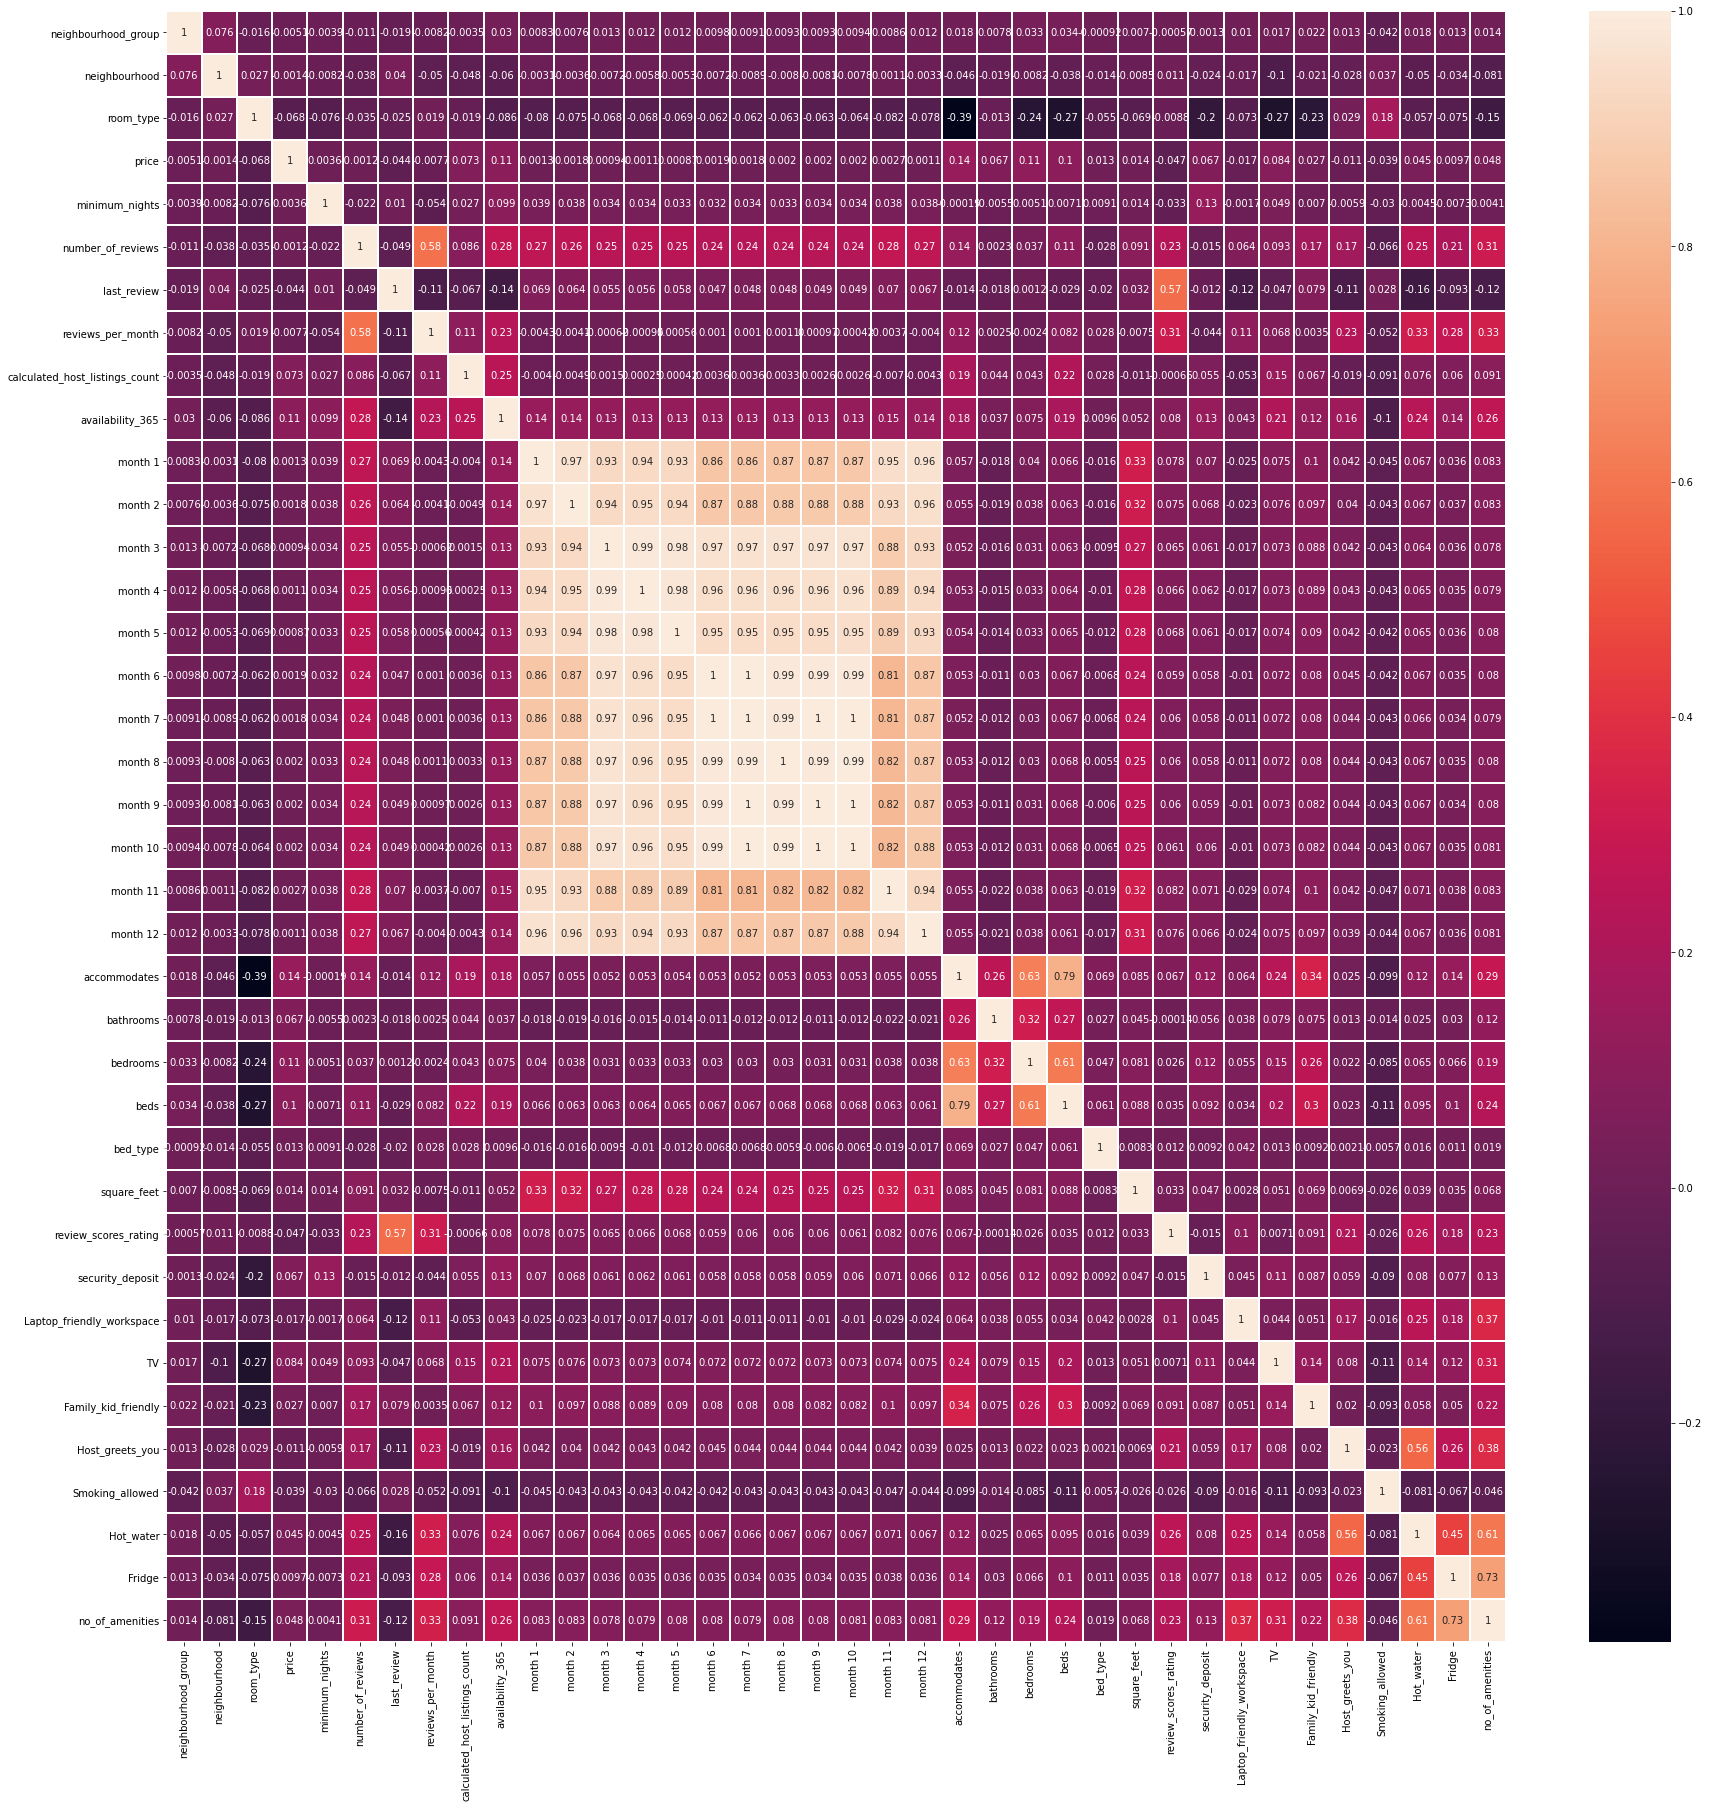

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax=plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.show()

Mivel a hónapok közötti korreláció nagy, ezért elég csak 1 hónapot megtartani a 12 hónap közül.

In [292]:
months=['month {0}'.format(i) for i in range(2, 13)]
print(months)
df=df.drop(months, axis=1)
df

['month 2', 'month 3', 'month 4', 'month 5', 'month 6', 'month 7', 'month 8', 'month 9', 'month 10', 'month 11', 'month 12']


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,4.0,18.0,0.0,60,4,118,506.0,3.76,4,141,258.0,3,1.0,1.0,2.0,4.0,0.0,93.0,200.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,29
1,6.0,95.0,1.0,17,2,6,533.0,1.42,1,0,221.0,2,1.0,1.0,1.0,4.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,6.0,98.0,0.0,90,62,143,1093.0,1.25,1,220,195.0,4,1.0,1.0,2.0,4.0,720.0,92.0,200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19
3,10.0,110.0,1.0,26,5,25,579.0,0.39,1,297,237.0,2,1.0,1.0,1.0,3.0,0.0,88.0,250.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,29
4,6.0,49.0,1.0,42,2,197,499.0,1.75,1,26,261.0,2,1.0,1.0,2.0,4.0,0.0,96.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,4.0,18.0,0.0,60,2,0,0.0,0.00,1,314,0.0,2,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9
22548,10.0,110.0,2.0,20,1,0,0.0,0.00,6,78,0.0,6,1.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,20
22549,6.0,98.0,0.0,85,3,0,0.0,0.00,2,15,0.0,2,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
22550,4.0,2.0,1.0,99,1,0,0.0,0.00,3,6,0.0,2,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19


Másik ilyen feature az ágyak száma (beds) ami korrelár a férőhelyek számával (accomodates):

In [293]:
df=df.drop(['beds'], axis=1)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,accommodates,bathrooms,bedrooms,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,no_of_amenities
0,4.0,18.0,0.0,60,4,118,506.0,3.76,4,141,258.0,3,1.0,1.0,4.0,0.0,93.0,200.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,29
1,6.0,95.0,1.0,17,2,6,533.0,1.42,1,0,221.0,2,1.0,1.0,4.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,6.0,98.0,0.0,90,62,143,1093.0,1.25,1,220,195.0,4,1.0,1.0,4.0,720.0,92.0,200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19
3,10.0,110.0,1.0,26,5,25,579.0,0.39,1,297,237.0,2,1.0,1.0,3.0,0.0,88.0,250.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,29
4,6.0,49.0,1.0,42,2,197,499.0,1.75,1,26,261.0,2,1.0,1.0,4.0,0.0,96.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,4.0,18.0,0.0,60,2,0,0.0,0.00,1,314,0.0,2,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9
22548,10.0,110.0,2.0,20,1,0,0.0,0.00,6,78,0.0,6,1.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,20
22549,6.0,98.0,0.0,85,3,0,0.0,0.00,2,15,0.0,2,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
22550,4.0,2.0,1.0,99,1,0,0.0,0.00,3,6,0.0,2,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19


Másik ilyen feature a hűtő megléte, ami erősen korrelár a szolgálatások számával.

In [294]:
df=df.drop(['Fridge'], axis=1)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,accommodates,bathrooms,bedrooms,bed_type,square_feet,review_scores_rating,security_deposit,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,no_of_amenities
0,4.0,18.0,0.0,60,4,118,506.0,3.76,4,141,258.0,3,1.0,1.0,4.0,0.0,93.0,200.0,1.0,1.0,1.0,0.0,0.0,1.0,29
1,6.0,95.0,1.0,17,2,6,533.0,1.42,1,0,221.0,2,1.0,1.0,4.0,0.0,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
2,6.0,98.0,0.0,90,62,143,1093.0,1.25,1,220,195.0,4,1.0,1.0,4.0,720.0,92.0,200.0,1.0,0.0,1.0,0.0,0.0,0.0,19
3,10.0,110.0,1.0,26,5,25,579.0,0.39,1,297,237.0,2,1.0,1.0,3.0,0.0,88.0,250.0,1.0,0.0,0.0,1.0,0.0,1.0,29
4,6.0,49.0,1.0,42,2,197,499.0,1.75,1,26,261.0,2,1.0,1.0,4.0,0.0,96.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,4.0,18.0,0.0,60,2,0,0.0,0.00,1,314,0.0,2,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9
22548,10.0,110.0,2.0,20,1,0,0.0,0.00,6,78,0.0,6,1.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,20
22549,6.0,98.0,0.0,85,3,0,0.0,0.00,2,15,0.0,2,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
22550,4.0,2.0,1.0,99,1,0,0.0,0.00,3,6,0.0,2,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19


# 2. Túl sok nulla értéket tartalmazó feature-k
Elhagyjuk a túl sok nulla értékeket tartalmazó oszlopokat, amelyben sok volt az ismeretlen vagy üres adatok.

In [295]:
#itt hasznaljuk fel a df2-t

for cell in df3.columns:
  if cell in df.columns:
    length=len(df[cell])
    print('sum: ',df3[cell].isna().sum())
    #30%-nal tobb az ures adat:
    if df3[cell].isna().sum()/float(length)>0.3:
      print('dropped cell: ', cell)
      df=df.drop([cell], axis=1)
df

sum:  0
sum:  0
sum:  0
sum:  0
sum:  0
sum:  0
sum:  3908
sum:  3914
sum:  0
sum:  0
sum:  0
sum:  0
sum:  32
sum:  18
sum:  0
sum:  22106
dropped cell:  square_feet
sum:  4389
sum:  9361
dropped cell:  security_deposit
sum:  0
sum:  0
sum:  0
sum:  0
sum:  0
sum:  0
sum:  0


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month 1,accommodates,bathrooms,bedrooms,bed_type,review_scores_rating,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,no_of_amenities
0,4.0,18.0,0.0,60,4,118,506.0,3.76,4,141,258.0,3,1.0,1.0,4.0,93.0,1.0,1.0,1.0,0.0,0.0,1.0,29
1,6.0,95.0,1.0,17,2,6,533.0,1.42,1,0,221.0,2,1.0,1.0,4.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,10
2,6.0,98.0,0.0,90,62,143,1093.0,1.25,1,220,195.0,4,1.0,1.0,4.0,92.0,1.0,0.0,1.0,0.0,0.0,0.0,19
3,10.0,110.0,1.0,26,5,25,579.0,0.39,1,297,237.0,2,1.0,1.0,3.0,88.0,1.0,0.0,0.0,1.0,0.0,1.0,29
4,6.0,49.0,1.0,42,2,197,499.0,1.75,1,26,261.0,2,1.0,1.0,4.0,96.0,1.0,0.0,1.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,4.0,18.0,0.0,60,2,0,0.0,0.00,1,314,0.0,2,1.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9
22548,10.0,110.0,2.0,20,1,0,0.0,0.00,6,78,0.0,6,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,20
22549,6.0,98.0,0.0,85,3,0,0.0,0.00,2,15,0.0,2,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
22550,4.0,2.0,1.0,99,1,0,0.0,0.00,3,6,0.0,2,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19


In [0]:
#kiiratas fajlba:
df.to_csv('summed_data_to_train.csv')